## Census Income Project

### Problem Statement:

**This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).**

Aim : The prediction task is to determine whether a person makes over $50K a year.

In [1]:
#Importing the libraries
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('census_income.csv')
data.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [2]:
data.shape

(32560, 15)

We have 32560 rows and 15 columns in the dataset.

In [3]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

We have integer and object type data in the dataset.

In [4]:
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

These are the number of unique values in each columns.

In [5]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

### Features in dataset(Independent Variable)

`Age` - Age of the person

`Workclass` - Work class of the person(' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',' Never-worked')

`Education` - Education qualification(' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',' Preschool', ' 12th')

`Education_num` - Education in years. 

`Marital_status` - Marital status of the person.(' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed')

`Occupation` - Occupation of the person. (' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',' Priv-house-serv')

`Relationship` - Current relationship(' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',' Other-relative')

`Race` - Race of the person(' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',' Other')

`Sex` - Gender of person(' Male', ' Female')

`Capital_gain` - Capital gain of the person

`Capital_loss` - Captial loss of the person

`Hours_per_week` - Working hours per week

`Native_country` - Native country of the person.

`Fnlwgt` - The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use all three sets of controls(A single cell estimate of the population 16+ for each state, Controls for Hispanic Origin by age and sex, Controls by Race, age and sex.) in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Target in dataset(Dependent Variable)

`Income` -   >50k or <=50k.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We have non null values in all the columns.

### Exploring the categorical variables

In [7]:
#User defined function to print the categories in each categorical variables.

for i in data.columns:
    if data[i].dtypes =='object':
        print(i,'\n',data[i].unique())
        print('^'*50)

Workclass 
 [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Marital_status 
 [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Occupation 
 [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Relationship 
 [' Husband' ' Not-in-family' ' W

We can see that there is '?' as category in columns ['Workclass','Occupation','Native_country'] for unknown data. So we can replace these values with the mode value of the columns.

In [8]:
cols = ['Workclass','Occupation','Native_country']
for i in cols:
    data[i].replace(" ?",data[i].mode()[0],inplace = True)

We have replaced the unknown values from the columns which was marked as ' ?' with the mode value of the columns.

### Checking for Missing Values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


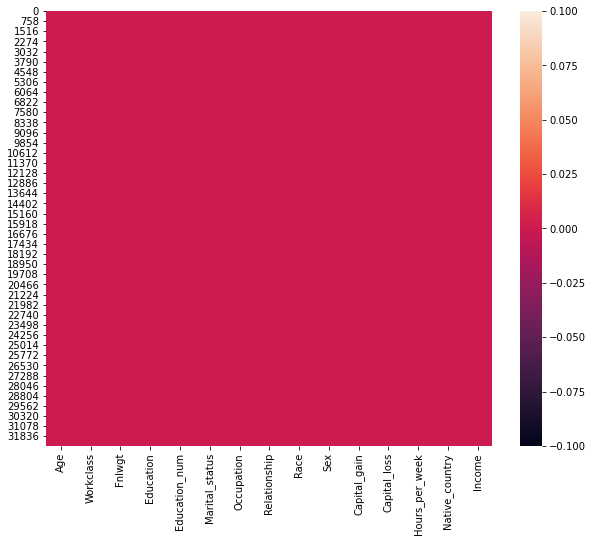

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[10,8])
sns.heatmap(data.isnull())
print(data.isnull().sum())

From the above observations, there are no null values in the dataset.

### Data Visualization

#### Univariate Analysis

In [10]:
#User defined function to plot the columns in histogram plot.
import numpy as np
def histogramplot(col):
    plt.figure(figsize=[4,4])
    sns.histplot(x =col,data = data,bins =6,kde=True)
    np.set_printoptions(suppress = True)
    print(np.histogram(data[col],bins=6))
    ax = plt.gca()
    ax.ticklabel_format(style='plain')
    plt.xticks(rotation = 90)

(array([ 9711, 10214,  7712,  3765,   992,   166], dtype=int64), array([17.        , 29.16666667, 41.33333333, 53.5       , 65.66666667,
       77.83333333, 90.        ]))


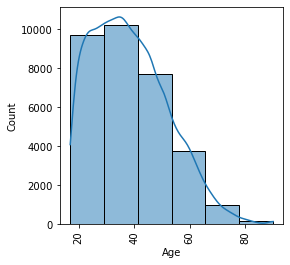

In [11]:
histogramplot('Age')

From the above observations, most of the population belongs to the age between 17 to 53.5.

(array([25907,  6292,   321,    27,     9,     4], dtype=int64), array([  12285.        ,  257688.33333333,  503091.66666667,
        748495.        ,  993898.33333333, 1239301.66666667,
       1484705.        ]))


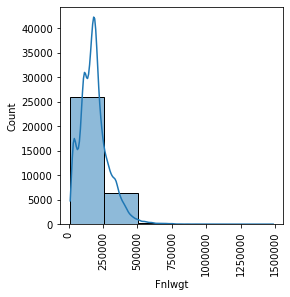

In [12]:
histogramplot('Fnlwgt')

From the above observations, most of the population are having a final weight between the range 12285 to 257688.

(array([32305,    89,     7,     0,     0,   159], dtype=int64), array([    0. , 16666.5, 33333. , 49999.5, 66666. , 83332.5, 99999. ]))


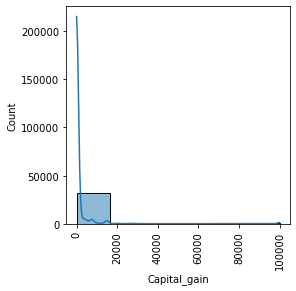

In [13]:
histogramplot('Capital_gain')

From the above observations, most of the population is having capital gain between the range 0-16667.

(array([31067,    59,  1204,   219,     2,     9], dtype=int64), array([   0.,  726., 1452., 2178., 2904., 3630., 4356.]))


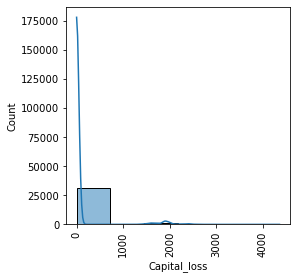

In [14]:
histogramplot('Capital_loss')

From the above observations, most of the population is having a capital loss between the range 0 to 730.

(array([ 1615,  3940, 20543,  5657,   601,   204], dtype=int64), array([ 1.        , 17.33333333, 33.66666667, 50.        , 66.33333333,
       82.66666667, 99.        ]))


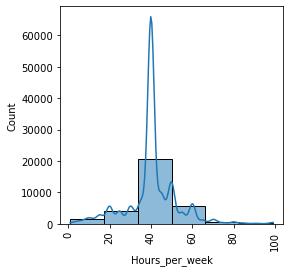

In [15]:
histogramplot('Hours_per_week')

From the above observations, most of the population is are working 33 to 50 hours a week.

In [16]:
#User defined function to plot the categorical variable using countplot
category_visualization = data[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']]
def count_plot(col):
    print(category_visualization[col].value_counts().sort_values(ascending = False))
    plt.figure(figsize = [12,4])
    sns.countplot(category_visualization[col])
    plt.xticks(rotation = 90)

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


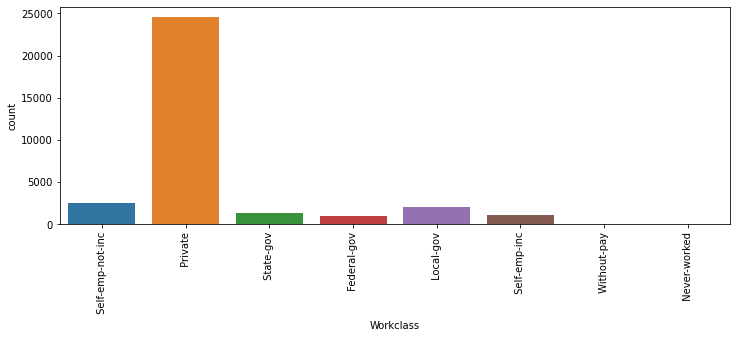

In [17]:
count_plot('Workclass')

From the above observations, most of the populations are working in private sector.

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


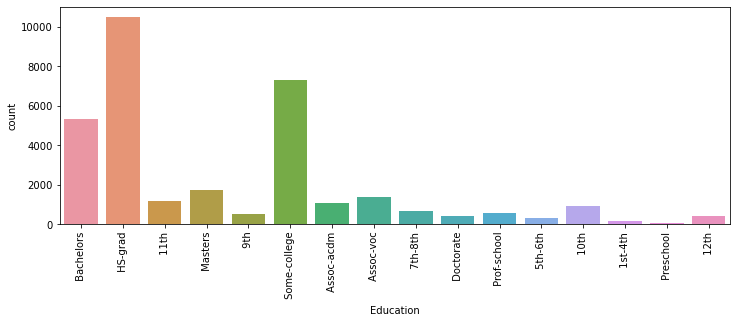

In [18]:
count_plot('Education')

From the above observations, most of the population is having high-School Graduation as education qualification.

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


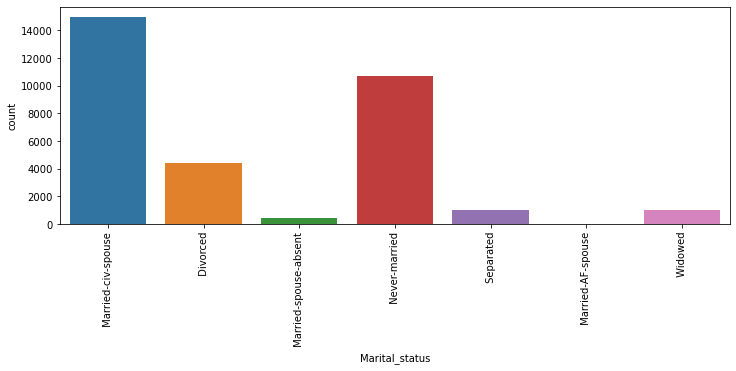

In [19]:
count_plot('Marital_status')

From the above observations, most of the population belongs to the married-civ-spouse.

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


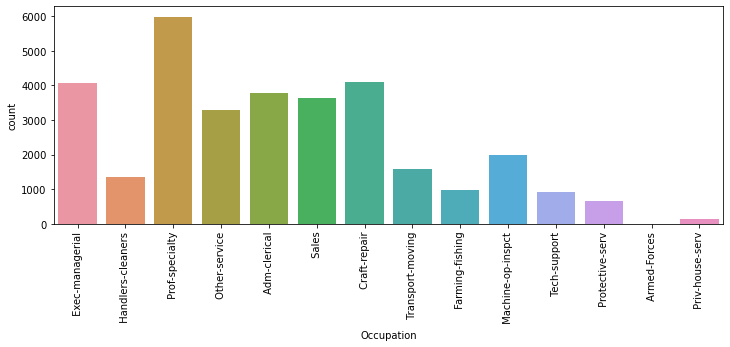

In [20]:
count_plot('Occupation')

From the above observations, most of the population is in professional speciality as occupation.

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


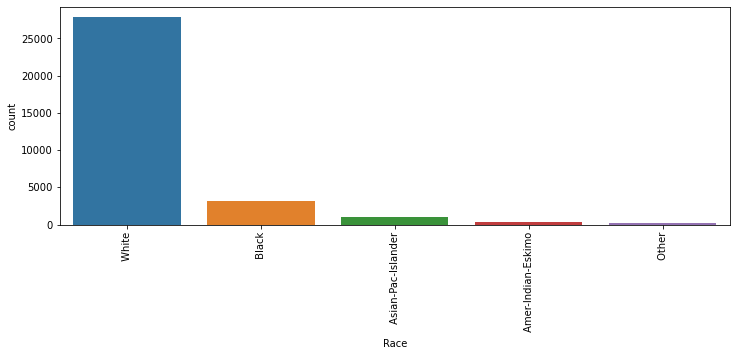

In [21]:
count_plot('Race')

From the above observations, most of the poppulations are from race 'White'.

 Male      21789
 Female    10771
Name: Sex, dtype: int64


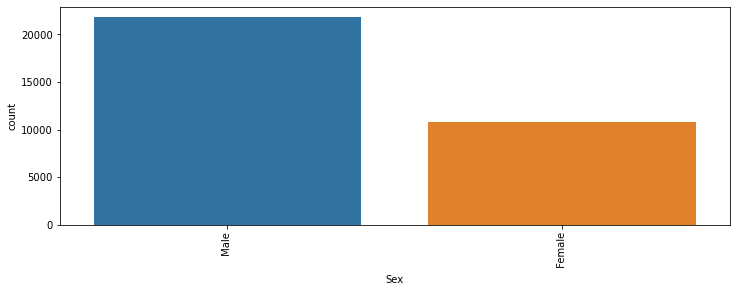

In [22]:
count_plot('Sex')

From the above observations, majority of the population are males. 

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

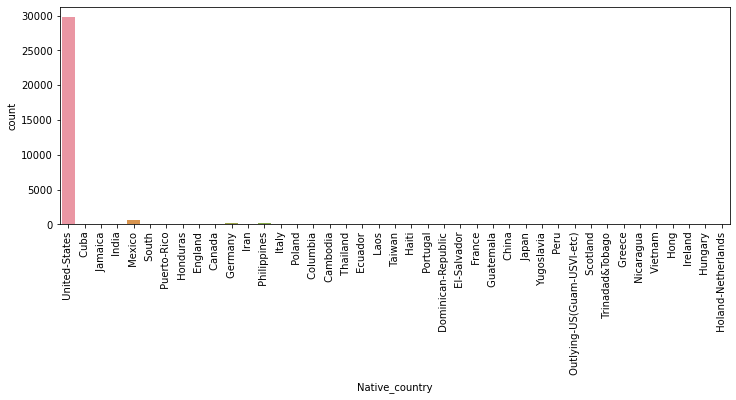

In [23]:
count_plot('Native_country')

From the above observations, most of the population is American native.

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


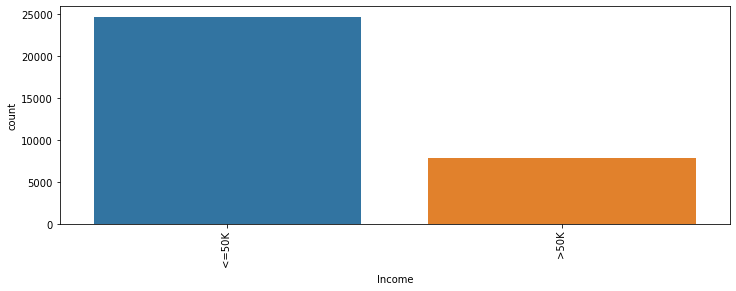

In [24]:
count_plot('Income')

From the above observations, most of the population is having less than 50k income.

#### Bivariate analysis.

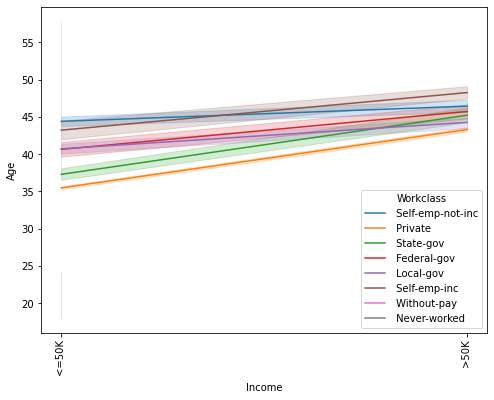

In [25]:
plt.figure(figsize = [8,6])
sns.lineplot('Income','Age',data = data,hue = 'Workclass')
plt.xticks(rotation = 90)
plt.show()

From the above observations, the income of a person is increasing from 35 years of age. 

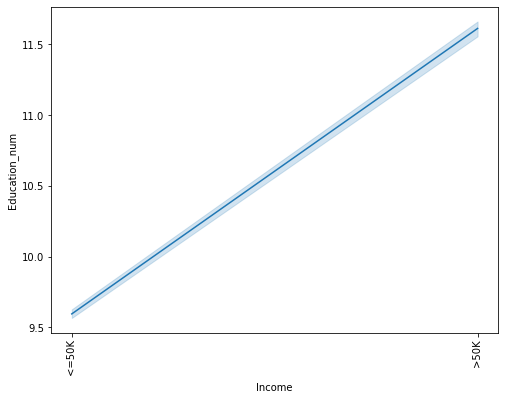

In [26]:
plt.figure(figsize = [8,6])
sns.lineplot('Income','Education_num',data = data)
plt.xticks(rotation = 90)
plt.show()

From the above observations, the income of a person is increasing as their number of years of education high.

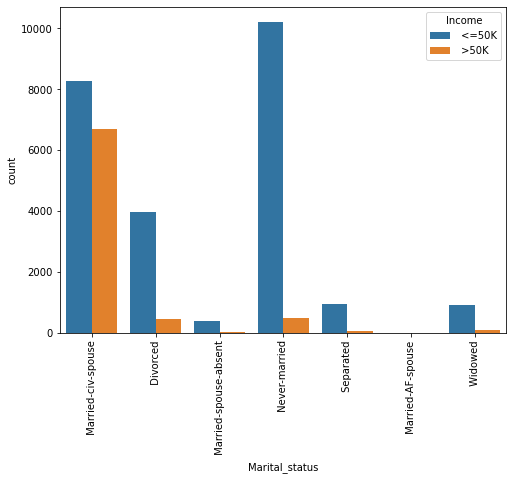

In [27]:
plt.figure(figsize = [8,6])
sns.countplot('Marital_status',data = data,hue = 'Income')
plt.xticks(rotation = 90)
plt.show()

From the above observations, people who are not married and having less than 50k income is more in the population. 

<AxesSubplot:xlabel='Capital_gain', ylabel='Age'>

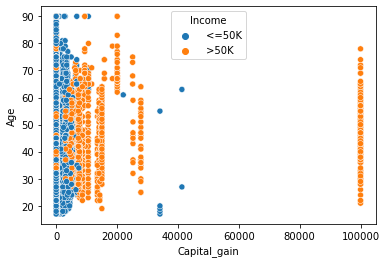

In [28]:
sns.scatterplot('Capital_gain','Age',data = data,hue = 'Income')

From the above observations, most of the population which are having less capital gain is having less than 50k income. People who have 1 lakh as capital gain are having more than 50k income. 

<AxesSubplot:xlabel='Capital_loss', ylabel='Age'>

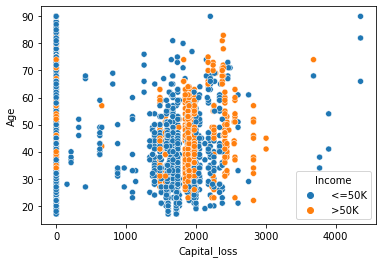

In [29]:
sns.scatterplot('Capital_loss','Age',data = data,hue = 'Income')

The data is not equally distributed, but most of the people who are having above 50k income have incurred a capital loss ranging between 1000 to 3000.

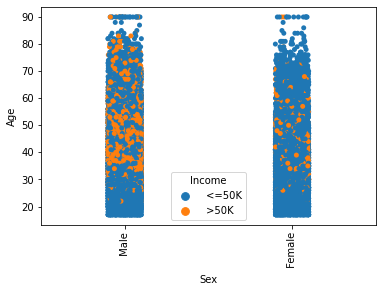

In [30]:
sns.stripplot('Sex','Age',data = data,hue= 'Income')
plt.xticks(rotation = 90)
plt.show()

Most of the population who are having more than 50k income are males and are above the age of 30 compared to females.

### Encoding of Categorical data

In [31]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
onc = OrdinalEncoder()
lnc = LabelEncoder()

In [32]:
data.select_dtypes(object).columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [33]:
data['Income'] = lnc.fit_transform(data['Income'].values.reshape(-1,1))    #Label encoding for target or label.

In [34]:
for i in data.columns:
    if data[i].dtypes =='object':
        data[i] = onc.fit_transform(data[i].values.reshape(-1,1)).astype('int64')    #Ordinal Encoding for the features.

In [35]:
data.dtypes

Age               int64
Workclass         int64
Fnlwgt            int64
Education         int64
Education_num     int64
Marital_status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int64
Income            int32
dtype: object

We have encoded all the categorical columns in the dataset.

### Statistical Summary

### Describe of the data

In [36]:
data.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


<AxesSubplot:>

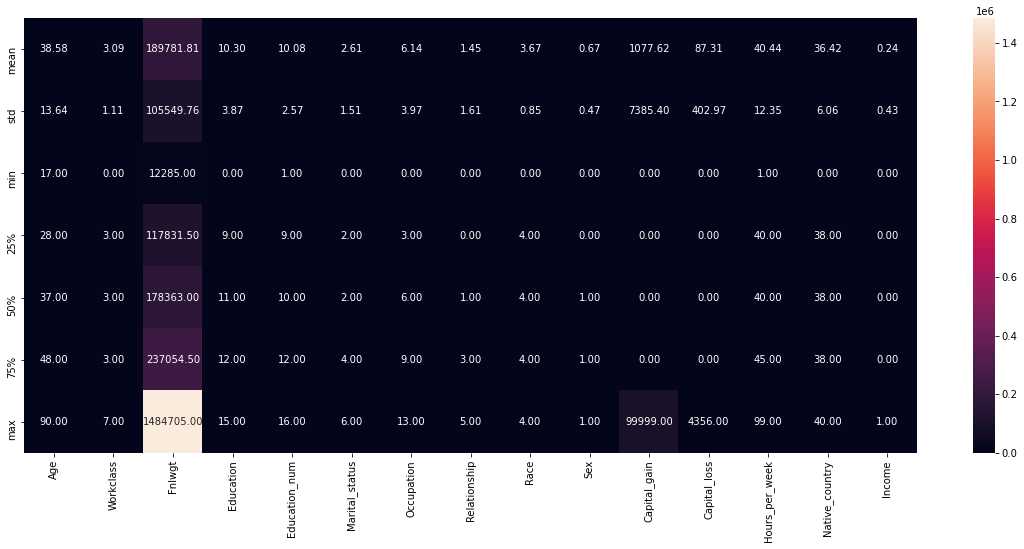

In [37]:
plt.figure(figsize=[20,8])
sns.heatmap(data.describe()[1:],annot=True,fmt='0.2f')

**Observations:**

Except the columns **['Education', 'Race', 'Sex', 'Native_country']** all other columns are having higher mean value than the median. That means the data in these columns are having skewness in distribution.

There is a huge difference between the maximum value and the 75% for the columns **['Fnlwgt', 'Capital_gain', 'Capital_loss']**. That means possible outliers are present in the data of these columns.

### Correlation

In [38]:
Correlation = data.corr()
Correlation

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995


<AxesSubplot:>

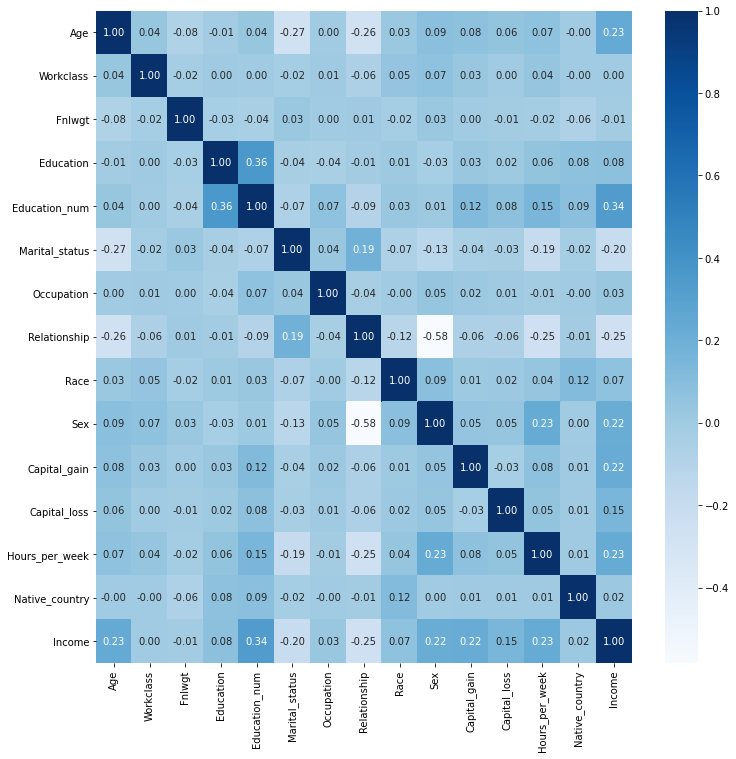

In [39]:
#Plotting the correlation of columns
plt.figure(figsize=[12,12])
sns.heatmap(Correlation,annot = True, fmt = '0.2f',cmap='Blues')

### Correlation with Target Column(Income)

Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Race              0.071853
Occupation        0.034599
Native_country    0.023063
Workclass         0.002739
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64


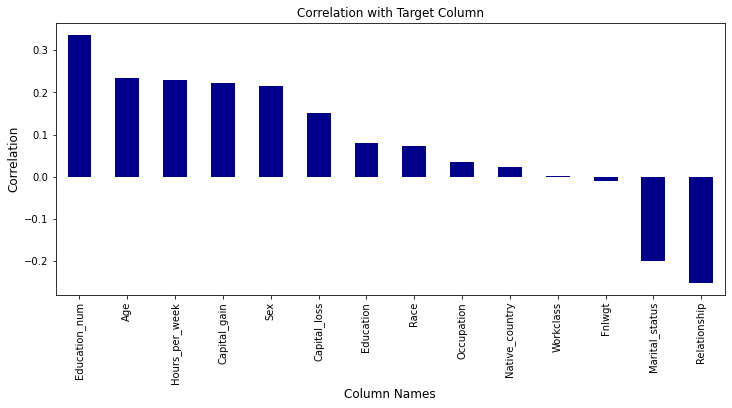

In [40]:
print(Correlation['Income'].drop('Income').sort_values(ascending = False))
plt.figure(figsize = [12,5])
Correlation['Income'].sort_values(ascending= False).drop('Income').plot(kind = 'bar', color ='darkblue')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

Observations:
    
1. Except the columns **['Fnlwgt', 'Marital_status', 'Relationship']** all other columns are having positve correlation to the targer variable **'Income'**.
2. The column **'Education_num'** is having highest positve correlation with the target variable **'Income'**. The columm **'Relationship'** is having highest negative correlation with the target variable **'Income'**.
3. The column **'Workclass'** is having least positve correlation to the target variable **'Income'**. The column **'Fnlwgt'** is having least negative correlation to the target variable **'Income'**.

### Distribution of data in columns(Checking skewness of data)

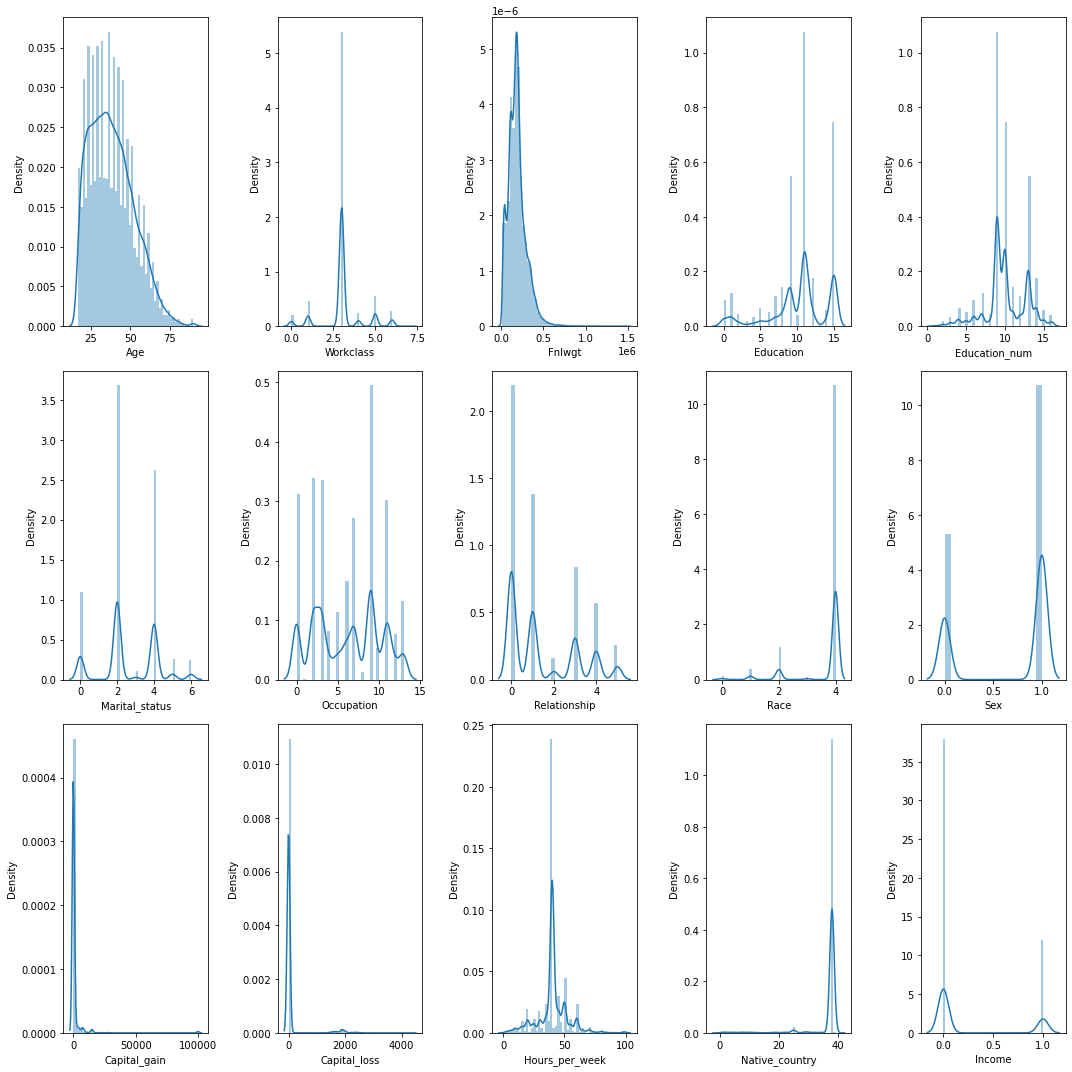

In [41]:
plt.figure(figsize = [15,15])
for i in range(0,len(data.columns.values)):
    plt.subplot(3,5,i+1)
    sns.distplot(data[data.columns.values[i]])
    plt.tight_layout()

The data is not normally distributed for all the columns. Skewness is present in all the columns.

### Skewness

In [42]:
Skewness = data.skew()
Skewness.sort_values(ascending = False)

Capital_gain      11.953690
Capital_loss       4.594549
Fnlwgt             1.446972
Income             1.212383
Relationship       0.786784
Age                0.558738
Hours_per_week     0.227636
Workclass          0.076178
Occupation         0.000536
Marital_status    -0.013448
Education_num     -0.311630
Sex               -0.719244
Education         -0.934063
Race              -2.435332
Native_country    -4.243083
dtype: float64

The columns **['Capital_gain', 'Capital_loss', 'Fnlwgt', 'Income']** are having high positive skewness. But we can ignore the column **'Income'** as it is our target column. The columns **['Native_country', 'Race']** are having high negative skewness.

### Checking the presence of outliers

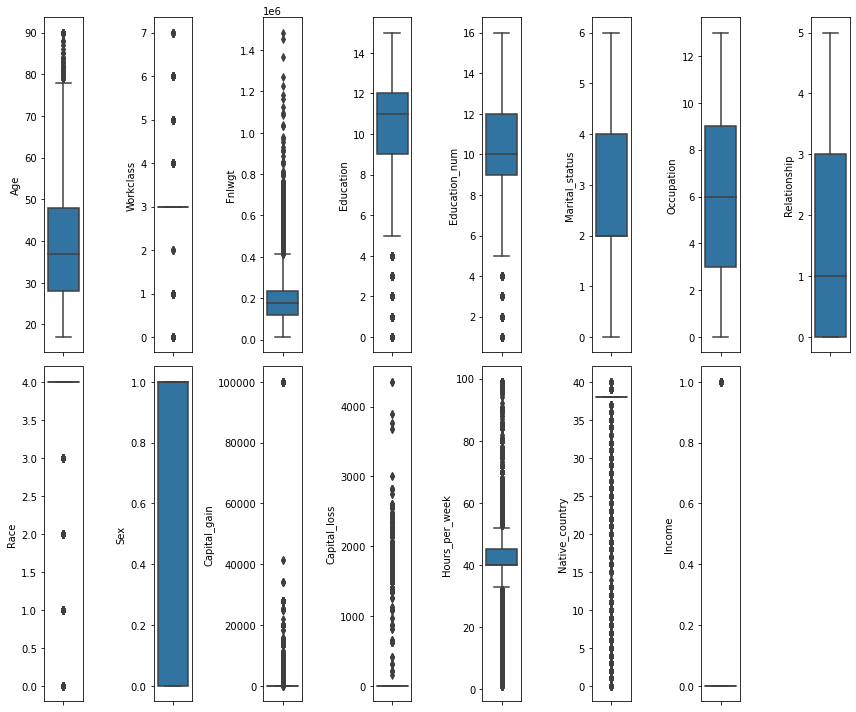

In [43]:
#Plotting the data of every columns with boxplot to check the outliers
plt.figure(figsize = [12,10])
for i in range(0,len(data.columns.values)):
    plt.subplot(2,8,i+1)
    sns.boxplot(y = data[data.columns.values[i]])
    plt.tight_layout()

From the above observations, outliers are present in all columns except the columns **['Marital_status', 'Occupation', 'Relationship', 'Sex']**.

We can ignore the columns **['Work class', 'Education', 'Race', 'Native_country','Income']** as these are categorical in nature, we can't consider the categories as outliers.

### Data Cleaning

### Checking whether the data is balanced or not

In [44]:
x = data.drop('Income',axis = 1)
y = data['Income']
print(x.shape)
print(y.shape)

(32560, 14)
(32560,)


0    24719
1     7841
Name: Income, dtype: int64


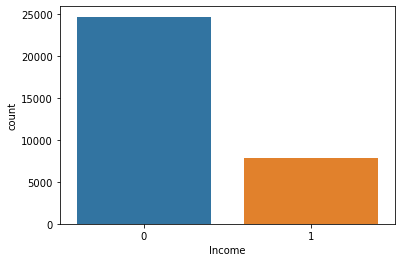

In [45]:
sns.countplot(y)
print(y.value_counts())

We have huge imbalance in the target data. The data for people below or equal to 50k are more in the dataset. We can reduce this imbalance of data.

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
xtrainw, ytrainw = sm.fit_resample(x,y)
ytrainw

0        0
1        0
2        0
3        0
4        0
        ..
49433    1
49434    1
49435    1
49436    1
49437    1
Name: Income, Length: 49438, dtype: int32

0    24719
1    24719
Name: Income, dtype: int64


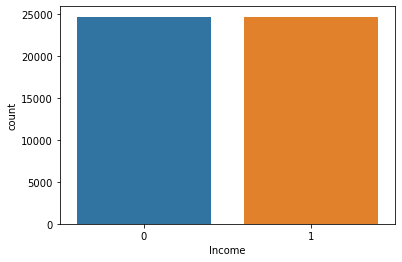

In [47]:
sns.countplot(ytrainw)
print(ytrainw.value_counts())

In [48]:
print(xtrainw.shape)
print(ytrainw.shape)

(49438, 14)
(49438,)


Now the data is balanced with equal distribution of data for both income more than and <=50k.

### Removing the Skewness

In [49]:
x = xtrainw.copy()
y = ytrainw.copy()
print(x.shape)
print(y.shape)

(49438, 14)
(49438,)


In [50]:
#We can set the skewness standard limit as +/-0.5.
x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.5]

Capital_gain      8.343041
Capital_loss      3.797763
Fnlwgt            1.395282
Relationship      1.127997
Sex              -0.827678
Education        -0.972405
Race             -2.511921
Native_country   -4.360843
dtype: float64

These are the variables which are having high skewness which is beyond the standard limit. Let's remove the skewness for these columns. We can ignore the categorical columns ['Relationship', 'Sex', 'Education', 'Race', 'Native_country'].

In [51]:
from sklearn.preprocessing import power_transform
#user defined function for removing skewness for columns which are beyond standard range
def rskew(col):
    x[col]=power_transform((x[col].values.reshape(-1,1)))

In [52]:
rskew("Capital_gain")
rskew("Capital_loss")
rskew("Fnlwgt")

In [53]:
x.skew().sort_values(ascending = False)

Capital_loss      3.566379
Capital_gain      2.203117
Relationship      1.127997
Age               0.349705
Marital_status    0.319301
Hours_per_week    0.128779
Fnlwgt            0.020036
Occupation        0.011985
Workclass        -0.118430
Education_num    -0.426855
Sex              -0.827678
Education        -0.972405
Race             -2.511921
Native_country   -4.360843
dtype: float64

Since the skewness is still high for the columns ['Capital_loss','Capital_gain'], we can drop these columns from the dataset.

In [54]:
x.drop(['Capital_loss','Capital_gain'],axis = 1, inplace = True)

In [55]:
x.skew().sort_values(ascending = False)

Relationship      1.127997
Age               0.349705
Marital_status    0.319301
Hours_per_week    0.128779
Fnlwgt            0.020036
Occupation        0.011985
Workclass        -0.118430
Education_num    -0.426855
Sex              -0.827678
Education        -0.972405
Race             -2.511921
Native_country   -4.360843
dtype: float64

The skewness for the numerical data has been removed.

### Removing the Outliers

#### Using ZScore method

In [56]:
from scipy.stats import zscore
df = x.copy()
df['Income'] = y.copy()
df.drop(['Workclass', 'Education', 'Race', 'Native_country','Income'],axis = 1, inplace = True)    #removing the categorical column from the dataset before removing outliers.
z = np.abs(zscore(df))
z

array([[0.7823951 , 1.1049886 , 1.04024895, ..., 0.73858953, 0.6684178 ,
        2.52985903],
       [0.18600627, 0.40130664, 0.59969517, ..., 0.08504137, 0.6684178 ,
        0.17375817],
       [1.02449544, 0.56750141, 1.41966723, ..., 0.73858953, 0.6684178 ,
        0.17375817],
       ...,
       [0.18600627, 0.42824691, 1.04024895, ..., 0.73858953, 0.6684178 ,
        0.69887178],
       [0.94379532, 0.28021761, 1.45023498, ..., 0.73858953, 0.6684178 ,
        0.3498198 ],
       [1.18589567, 1.56205732, 1.04024895, ..., 1.22205495, 0.6684178 ,
        0.43554716]])

In [57]:
threshold = 3
df_new = df[(z<3).all(axis=1)]
df_new['Workclass'] = x['Workclass']
df_new['Education'] = x['Education']
df_new['Race'] = x['Race']
df_new['Native_country'] = x['Native_country']
df_new['Income'] = y.copy()
df_new

,Age,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Sex,Hours_per_week,Workclass,Education,Race,Native_country,Income
0,50,-1.104989,13,2,3,0,1,13,5,9,4,38,0
1,38,0.401307,9,0,5,1,1,40,3,11,4,38,0
2,53,0.567501,7,2,5,0,1,40,3,1,2,38,0
3,28,1.357763,13,2,9,5,0,40,3,9,2,4,0
4,37,0.968234,14,2,3,5,0,40,3,12,4,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,38,-0.212903,13,0,2,0,1,44,3,11,4,38,1
49434,58,-1.051249,10,2,4,0,1,40,1,9,1,38,1
49435,38,-0.428247,13,2,6,0,1,50,3,10,4,38,1
49436,52,0.280218,14,2,9,0,1,46,5,13,4,38,1


In [58]:
df['Workclass'] = x['Workclass']
df['Education'] = x['Education']
df['Race'] = x['Race']
df['Native_country'] = x['Native_country']
df['Income'] = y.copy()
df.shape

(49438, 13)

In [59]:
df_new.shape

(47804, 13)

In [60]:
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

3.3051498847040737

We are losing only 3.33% of data after removing outliers using zscore method.

#### Using Inter Quartile range method

In [61]:
x1 = x.drop(['Workclass', 'Education', 'Race', 'Native_country'],axis = 1)
# 1st quantile

Q1=x.quantile(0.25)

# 3rd quantile
Q3=x.quantile(0.75)

# IQR
IQR=Q3 - Q1
df.drop(['Workclass', 'Education', 'Race', 'Native_country','Income'],axis = 1,inplace = True)
df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [62]:
df_1['Workclass'] = x['Workclass']
df_1['Education'] = x['Education']
df_1['Race'] = x['Race']
df_1['Native_country'] = x['Native_country']
df_1['Income'] = y.copy()
df_1.shape

(42259, 13)

In [63]:
df['Workclass'] = x['Workclass']
df['Education'] = x['Education']
df['Race'] = x['Race']
df['Native_country'] = x['Native_country']
df['Income'] = y.copy()
df.shape

(49438, 13)

In [64]:
data_loss = (df.shape[0]-df_1.shape[0])/df.shape[0]*100
data_loss

14.521218495893848

We are losing 14.57% of data after removing outliers using IQR method which is a huge loss of data. So we can stick to the ZScore method as it is losing only 3.33% of data after removing outliers. 

### Checking the Multicolinearity of variables in the dataframe

In [65]:
x = df_new.drop('Income',axis = 1)
y = df_new['Income']
c = x.columns
print(x.shape)
print(y.shape)

(47804, 12)
(47804,)


In [66]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = c)
x

,Age,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Sex,Hours_per_week,Workclass,Education,Race,Native_country
0,0.826518,-1.116489,1.068186,-0.28567,-0.813924,-0.737128,0.669879,-2.825487,1.842460,-0.425901,0.392558,0.254316
1,-0.171767,0.423991,-0.683791,-1.80937,-0.281437,-0.083392,0.669879,-0.183325,0.004326,0.169684,0.392558,0.254316
2,1.076090,0.593958,-1.559780,-0.28567,-0.281437,-0.737128,0.669879,-0.183325,0.004326,-2.808240,-2.097107,0.254316
3,-1.003671,1.402154,1.068186,-0.28567,0.783537,2.531551,-1.492807,-0.183325,0.004326,-0.425901,-2.097107,-6.000008
4,-0.254957,1.003784,1.506181,-0.28567,-0.813924,2.531551,-1.492807,-0.183325,0.004326,0.467476,0.392558,0.254316
...,...,...,...,...,...,...,...,...,...,...,...,...
47799,-0.171767,-0.204158,1.068186,-1.80937,-1.080168,-0.737128,0.669879,0.208107,0.004326,0.169684,0.392558,0.254316
47800,1.492042,-1.061530,-0.245797,-0.28567,-0.547681,-0.737128,0.669879,-0.183325,-1.833808,-0.425901,-3.341939,0.254316
47801,-0.171767,-0.424389,1.068186,-0.28567,-0.015194,-0.737128,0.669879,0.795254,0.004326,-0.128109,0.392558,0.254316
47802,0.992899,0.300154,1.506181,-0.28567,0.783537,-0.737128,0.669879,0.403822,1.842460,0.765269,0.392558,0.254316


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [68]:
calc_vif(x)

,Column Name,VIF Factor
0,Age,1.176173
1,Fnlwgt,1.008848
2,Education_num,1.130129
3,Marital_status,1.150546
4,Occupation,1.015920
5,Relationship,1.757978
6,Sex,1.567865
7,Hours_per_week,1.157522
8,Workclass,1.006525
9,Education,1.069686


We don't have much variance of inflation for the variables in the dataset which is a good sign that there is no multicolinearity between the variables in the dataset.

In [69]:
#Steps performed till now
#1. Loaded the data
#2. Checked shape(rows and columns), data types, count of unique values in each columns.
#3. Features(Independent) and target(dependent) in the dataset
#4. Explored non-null values and unique values in categorical variables.
#5. Replaced the unknown values from the columns which was marked as ' ?' with the mode value of the columns.
#6. Checked for missing values
#7. Data visualization
    #Univariate analysis - Using histogramplot, countplot
    #Bivariate analysis - lineplot, countplot, scatterplot. stripplot
#8. Encoded the categorical data in variables.
    #Label encoding - for target variable 
    #Ordinal Encoding for categorical features.  
#Statistical Summary
#9. Describe of the data
#10.Correlation
#11. Correlation with target variable
#12. Checked distribution of data in columns(Checking skewness of data)
#13. Checked skewness of data
#14. Checked presense of outliers
#Data Cleansing
#15. Checked and removed imbalance of data
#16. Removed the Skewness of data
    #Dropped columns ['Capital_loss', 'Capital_gain'] as there was huge skewness present in the data of these two variables
#17. Removed outliers using Zscore and IQR method in which the Zscore method found to be best since it was incurring less data 
    #loss after revmoing outliers.
#18. Checked for multicolinearity

### EDA Completed

### Building the Model - Classification

#### Splitting the data into features and target

In [70]:
features = x.copy()
target = y.copy()
print(features.shape)
print(target.shape)

(47804, 12)
(47804,)


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [72]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
sgdc = SGDClassifier()
etc = ExtraTreesClassifier()
xgbc = XGBClassifier()

#### Finding the best random_state

In [73]:
#User defined function for finding the best random state
def best_ran(model):
    maxAcc = 0
    maxRs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = accuracy_score(target_test,pred_test)
        if acc>maxAcc:
            maxAcc = acc
            maxRs = i
    print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

In [74]:
#User defined Function for training and testing the model with best random state

def mod_test(model, ran):
    model
    print(model)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    print("Accuracy Score is ",accuracy_score(target_test,pred_test))
    print(confusion_matrix(target_test,pred_test))
    print(classification_report(target_test,pred_test))

#### LogisticRegression

In [75]:
best_ran(lr)

LogisticRegression()
At random state  67 the model is having accuracy score of  0.7692709967576613


In [75]:
mod_test(lr,40)

LogisticRegression()
Accuracy Score is  0.7632845188284518
[[3327 1302]
 [ 961 3970]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      4629
           1       0.75      0.81      0.78      4931

    accuracy                           0.76      9560
   macro avg       0.76      0.76      0.76      9560
weighted avg       0.76      0.76      0.76      9560



#### DecisionTreeClassifier

In [77]:
best_ran(dtc)

DecisionTreeClassifier()
At random state  76 the model is having accuracy score of  0.8369417424955549


In [76]:
mod_test(dtc,62)

DecisionTreeClassifier()
Accuracy Score is  0.8337866108786611
[[3895  779]
 [ 810 4076]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4674
           1       0.84      0.83      0.84      4886

    accuracy                           0.83      9560
   macro avg       0.83      0.83      0.83      9560
weighted avg       0.83      0.83      0.83      9560



#### RandomForestClassifier

In [79]:
best_ran(rfc)

RandomForestClassifier()
At random state  16 the model is having accuracy score of  0.8804518355820521


In [77]:
mod_test(rfc,62)

RandomForestClassifier()
Accuracy Score is  0.874163179916318
[[4075  599]
 [ 604 4282]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4674
           1       0.88      0.88      0.88      4886

    accuracy                           0.87      9560
   macro avg       0.87      0.87      0.87      9560
weighted avg       0.87      0.87      0.87      9560



#### AdaBoostClassifier

In [81]:
best_ran(abc)

AdaBoostClassifier()
At random state  76 the model is having accuracy score of  0.8509570128647631


In [78]:
mod_test(abc,76)

AdaBoostClassifier()
Accuracy Score is  0.8353556485355649
[[3736  949]
 [ 625 4250]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      4685
           1       0.82      0.87      0.84      4875

    accuracy                           0.84      9560
   macro avg       0.84      0.83      0.83      9560
weighted avg       0.84      0.84      0.84      9560



#### GradientBoostingClassifier

In [83]:
best_ran(gbc)

GradientBoostingClassifier()
At random state  56 the model is having accuracy score of  0.8733396088275285


In [79]:
mod_test(gbc,1)

GradientBoostingClassifier()
Accuracy Score is  0.8656903765690377
[[3965  766]
 [ 518 4311]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4731
           1       0.85      0.89      0.87      4829

    accuracy                           0.87      9560
   macro avg       0.87      0.87      0.87      9560
weighted avg       0.87      0.87      0.87      9560



#### SGDClassifier

In [85]:
best_ran(sgdc)

SGDClassifier()
At random state  23 the model is having accuracy score of  0.766028658090158


In [80]:
mod_test(sgdc,23)

SGDClassifier()
Accuracy Score is  0.7533472803347281
[[3329 1389]
 [ 969 3873]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      4718
           1       0.74      0.80      0.77      4842

    accuracy                           0.75      9560
   macro avg       0.76      0.75      0.75      9560
weighted avg       0.76      0.75      0.75      9560



#### ExtraTreesClassifier

In [87]:
best_ran(etc)

ExtraTreesClassifier()
At random state  36 the model is having accuracy score of  0.8779416379039849


In [81]:
mod_test(etc,36)

ExtraTreesClassifier()
Accuracy Score is  0.8711297071129707
[[4026  623]
 [ 609 4302]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4649
           1       0.87      0.88      0.87      4911

    accuracy                           0.87      9560
   macro avg       0.87      0.87      0.87      9560
weighted avg       0.87      0.87      0.87      9560



#### XGBClassifier

In [78]:
best_ran(xgbc)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
At random state  30 the model is having accuracy score of  0.8868319213471394


In [80]:
mod_test(xgbc,30)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy Score is  0.8868319213471394
[[4174  539]
 [ 543 4305]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4713
           1       0.89      0.89      0.89      4848

    accuracy                           0.89      9561
   macro avg      

After testing all the algorithms, most of the ensemble methods are performing well and the XGB Classifier is providing maximum accuracy score of 88.7%.

Now let's cross validate the models to find the best model performing well with cross validations.

### Cross Validation

In [75]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model,ran):    #ran = random_state
    cv_mean = 0
    cv_fold = 0
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    for j in range(2,10):
        cv_score = cross_val_score(model,features, target, cv = j)
        a =cv_score.mean()
        if a>cv_mean:
            cv_mean = a
            cv_fold = j
    print(model)
    print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the Accuracy Score  is ",accuracy_score(target_test,pred_test))

#### LogisticRegression

In [95]:
cross_val(lr,40)

LogisticRegression()
At cv fold 8  the cv score is  0.7567578192827097 and the Accuracy Score  is  0.7627863194226545


#### DecisionTreeClassifier

In [96]:
cross_val(dtc,62)

DecisionTreeClassifier()
At cv fold 9  the cv score is  0.8268181147359789 and the Accuracy Score  is  0.8267963602133668


#### RandomForestClassifier

In [97]:
cross_val(rfc,62)

RandomForestClassifier()
At cv fold 8  the cv score is  0.8700990013050808 and the Accuracy Score  is  0.876372764355193


#### AdaBoostClassifier

In [98]:
cross_val(abc,76)

AdaBoostClassifier()
At cv fold 9  the cv score is  0.8374430219465698 and the Accuracy Score  is  0.8509570128647631


#### GradientBoostingClassifier

In [99]:
cross_val(gbc,1)

GradientBoostingClassifier()
At cv fold 9  the cv score is  0.8559569784504238 and the Accuracy Score  is  0.8641355506746157


#### SGDClassifier

In [100]:
cross_val(sgdc,23)

SGDClassifier()
At cv fold 6  the cv score is  0.7539752804364187 and the Accuracy Score  is  0.7600669386047485


#### ExtraTreesClassifier

In [101]:
cross_val(etc,36)

ExtraTreesClassifier()
At cv fold 9  the cv score is  0.8670658753762303 and the Accuracy Score  is  0.8772094969145486


#### XGBClassifier

In [81]:
cross_val(xgbc,30)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
At cv fold 9  the cv score is  0.871730622672703 and the Accuracy Score  is  0.8868319213471394


### After cross validations, the XG Boosting Classifier is providing the maximum accurarcy score of 88.7% with highest cross validation mean score of 87.17%. So we can consider the xgbc model as the best performing model.

In [93]:
xgbc = XGBClassifier()
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 30)
xgbc.fit(features_train, target_train)
pred_test = xgbc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_test))
print(confusion_matrix(target_test,pred_test))
print(classification_report(target_test,pred_test))

Accuracy Score is  0.8868319213471394
[[4174  539]
 [ 543 4305]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4713
           1       0.89      0.89      0.89      4848

    accuracy                           0.89      9561
   macro avg       0.89      0.89      0.89      9561
weighted avg       0.89      0.89      0.89      9561



### Hyperparameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV
parameters = {'booster':['gbtree','dart'],
             'eta': [0.3,0.4],
             'max_depth': [20,6],
             'sampling_method':['uniform','subsample']}

grid = GridSearchCV(estimator = XGBClassifier(),param_grid=parameters, cv = 9)

In [85]:
grid.fit(features,target)

GridSearchCV(cv=9,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [86]:
grid.best_score_

0.8727768508289103

In [87]:
grid.best_params_

{'booster': 'gbtree',
 'eta': 0.3,
 'max_depth': 20,
 'sampling_method': 'uniform'}

In [94]:
xgbc = XGBClassifier(booster='gbtree',eta=0.3,max_depth=20,sampling_method='uniform')
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 30)
xgbc.fit(features_train, target_train)
pred_test = xgbc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_test))
print(confusion_matrix(target_test,pred_test))
print(classification_report(target_test,pred_test))

Accuracy Score is  0.8797196945926158
[[4141  572]
 [ 578 4270]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4713
           1       0.88      0.88      0.88      4848

    accuracy                           0.88      9561
   macro avg       0.88      0.88      0.88      9561
weighted avg       0.88      0.88      0.88      9561



The hyper parameter tuning didn't improve the accuracy score.

### After all the tests, cross validations and tunings, the XGBoost classifier(xgbc) is performing well with maximum accuracy score of 88.7% with a cross validation mean score of 87.1% for 9 cross validations.

### AUC ROC Curve

In [95]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [96]:
#User defined function for plotting AUC ROC curve for different models

def auc_roc(model):
    target_pred_prob = model.predict_proba(features_test)[:,1]
    fpr,tpr,thresholds = roc_curve(target_test,target_pred_prob)
    auc_score = roc_auc_score(target_test, model.predict(features_test))
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label = 'AUC ='+str(round(auc_score,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.title(model)
    plt.show()

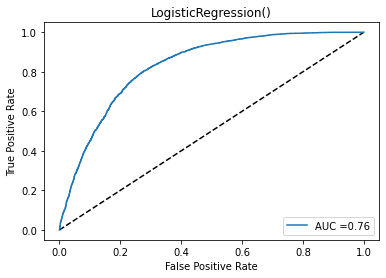

In [89]:
auc_roc(lr)

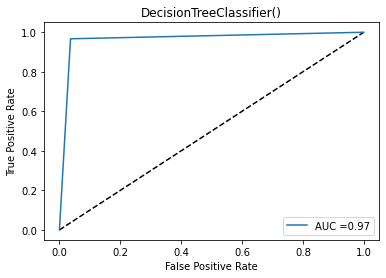

In [90]:
auc_roc(dtc)

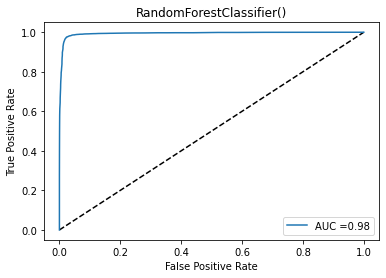

In [91]:
auc_roc(rfc)

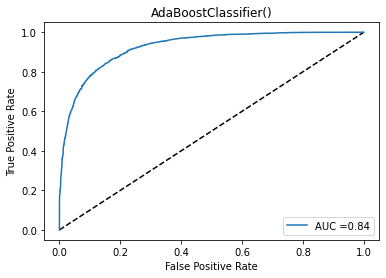

In [92]:
auc_roc(abc)

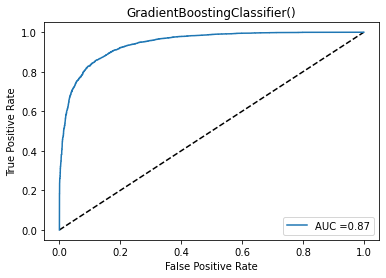

In [93]:
auc_roc(gbc)

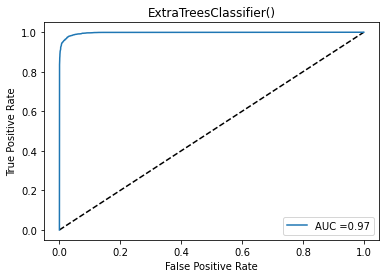

In [95]:
auc_roc(etc)

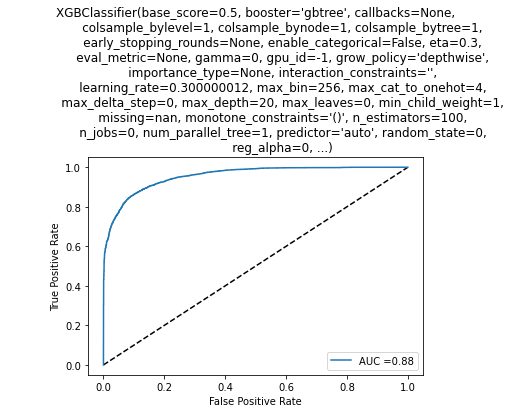

In [97]:
auc_roc(xgbc)

The DecisionTree Classifier, RandomForest Classifier and the ExtraTree Classifier models have provided maximum auc roc score. The XGBoost Classifier have provided an AUC ROC score of 88%. Since the xgbc model is performing well with all other tests, cross validations and tunings, we will consider this model as the best performing model.

### The XGBoost Classifier(xgbc) model is giving an accuracy score of 88.7%.

### Saving the Best Model

In [98]:
import pickle

filename = 'Census income prediction model.pkl'
pickle.dump(xgbc,open(filename,'wb'))

### Conclusion

In [106]:
original = np.array(target_test)
predicted = np.round(np.array(xgbc.predict(features_test)),0)
df_prediction = pd.DataFrame({'Original Income':original,'Predicted Income':predicted})
df_prediction.sample(10)

,Original Income,Predicted Income
7980,1,1
5235,1,1
4272,1,1
2531,1,1
1979,0,0
5072,0,0
8667,0,0
1276,0,0
7571,0,0
3987,1,1


### Our xgbc model have is performing well with predictions without any errors.

Now we can use this model to predict whether the person makes over $50K a year or not on the basis of the details provided below:

1. `Age`
2. `Fnlwgt`
3. `Education_num`
4. `Marital_status`
5. `Occupation`
6. `Relationship`
7. `Sex`
8.`Hours_per_week`
9. `Workclass`
10. `Education`
11. `Race`
12. `Native_country`

### Predictive Model Created Successfully